<a href="https://colab.research.google.com/github/t1seo/AIFFEL/blob/master/EXPLORATION/02/toy_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # confusion matrix
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # f1-score
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print(f"정확도: {0: 4f}, 정밀도: {1: 4f}, 재현율: {2: 4f}, \
        F1: {3: 4f}, AUC: {4: 4f}".format(accuracy, precision, recall, f1, roc_auc))

In [2]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받는다
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fcsprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다
- `load_digits` : 손글씨 이미지 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits))

## (1) 필요한 모듈 import하기

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings(action='ignore')

## (2) 데이터 준비

In [4]:
digits = load_digits()

print(dir(digits))

['DESCR', 'data', 'images', 'target', 'target_names']


In [5]:
def print_data_info(scikit_data, feature_names=False):
    print("data의 type: ", type(scikit_data))
    print("data의 shape: ", scikit_data.data.shape)
    print()
    
    if feature_names:
        print("feature_name 출력: ")
        print(scikit_data.feature_names)
        print()
        print("feature_name의 type: ", type(scikit_data.feature_names))
        print("feature_name의 shape: ", len(scikit_data.feature_names))
        print()

    print("target_name: ", scikit_data.target_names)
    print("target_name의 type: ", type(scikit_data.target_names))
    print("target_name의 shape: ", len(scikit_data.target_names))
    print()


    print("target의 type: ", type(scikit_data.target))
    print("target의 shape: ", scikit_data.target.shape)
    print()

## (3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [6]:
print_data_info(digits)

data의 type:  <class 'sklearn.utils.Bunch'>
data의 shape:  (1797, 64)

target_name:  [0 1 2 3 4 5 6 7 8 9]
target_name의 type:  <class 'numpy.ndarray'>
target_name의 shape:  10

target의 type:  <class 'numpy.ndarray'>
target의 shape:  (1797,)



In [7]:
# 0번 데이터의 내용확인
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
digits.target.shape

(1797,)

- `digit_data`에 feature가 들어 있고, `digit_target`에 target이 들어있다.

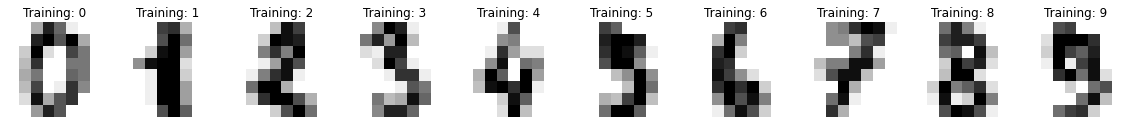

In [10]:
import matplotlib.pyplot as plt

# 이미지 확인
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 20))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [11]:
# feature data와 label data 지정
feature_data = digits.data
label_data = digits.target

## (4) train, test 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data, 
                                                    label_data,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"학습 데이터: {X_train.shape}, {y_train.shape}")
print(f"테스트 데이터: {X_test.shape}, {y_test.shape}")

학습 데이터: (1437, 64), (1437,)
테스트 데이터: (360, 64), (360,)


## (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

어떤 모델이 가장 좋은 성능을 보일까?

### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"Decision Tree 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.92      0.79      0.85        28
           2       0.96      0.79      0.87        33
           3       0.65      0.88      0.75        34
           4       0.80      0.89      0.85        46
           5       0.94      0.96      0.95        47
           6       0.94      0.94      0.94        35
           7       0.86      0.88      0.87        34
           8       0.75      0.70      0.72        30
           9       0.89      0.82      0.86        40

    accuracy                           0.86       360
   macro avg       0.87      0.85      0.86       360
weighted avg       0.87      0.86      0.86       360

Decision Tree 정확도: 0.861


### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"Random Forest 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Random Forest 정확도: 0.981


### Support Vector Machine (SVM)

In [15]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

svm_model = svm.SVC()
svm_model.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = svm_model.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SVM 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

SVM 정확도: 0.981


### Stochastic Gradient Descent Classifier (SGDClassifier)

In [16]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier()
sgc_clf.fit(X_train, y_train)
pred = sgc_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SGDClassfier 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      0.98      0.98        46
           5       0.92      0.98      0.95        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       0.82      0.93      0.87        30
           9       0.97      0.88      0.92        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

SGDClassfier 정확도: 0.961


### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

lr = LogisticRegression(max_iter=100)
lr.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = lr.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SGDClassfier 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

SGDClassfier 정확도: 0.972


## (6) 모델을 평가해 보기

**모델별 정확도**
- Decision Tree: 0.850
- Random Forest: 0.981
- SVM: 0.981
- SGCClassifier: 0.956
- LogisticRegression: 0.972

손글씨 분류의 경우 잘 예측을 하는 것이 중요하고 예측이 틀렸다고 하더라고 크게 문제되지 않기 때문에 **정확도(Accuracy)**를 평가 지표로 선택하는 것이 타당할 것이다.

정확도를 기준으로 봤을 때 SVM과 Random Forest가 가장 높은 정확도를 보였다.

# 2-12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다
- `load_wine` : 와인 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine))

## (1) 필요한 모듈 import하기

In [18]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [19]:
wine = load_wine()

print(dir(wine))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


## (3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [20]:
print_data_info(wine, feature_names=True)

data의 type:  <class 'sklearn.utils.Bunch'>
data의 shape:  (178, 13)

feature_name 출력: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

feature_name의 type:  <class 'list'>
feature_name의 shape:  13

target_name:  ['class_0' 'class_1' 'class_2']
target_name의 type:  <class 'numpy.ndarray'>
target_name의 shape:  3

target의 type:  <class 'numpy.ndarray'>
target의 shape:  (178,)



- 와인 데이터는에는 총 178개의 데이터가 있고, target에는 세 가지 종류의 와인이 있는 것을 확인 할 수 있다.

In [21]:
import pandas as pd

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['label'] = wine.target
wine_df['label'].value_counts()

1    71
0    59
2    48
Name: label, dtype: int64

In [22]:
# feature data와 label data 지정
wine_data = wine.data
wine_target = wine.target

## (4) train, test 데이터 분리

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_target,
                                                   test_size=0.2,
                                                   random_state=42)

print(f"학습 데이터: {X_train.shape}, {y_train.shape}")
print(f"테스트 데이터: {X_test.shape}, {y_test.shape}")

학습 데이터: (142, 13), (142,)
테스트 데이터: (36, 13), (36,)


## (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

어떤 모델이 가장 좋은 성능을 보일까?

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"Decision Tree 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Decision Tree 정확도: 0.944


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"Random Forest 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Random Forest 정확도: 1.000


### Support Vector Machine (SVM)

In [26]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

svm_model = svm.SVC()
svm_model.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = svm_model.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SVM 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

SVM 정확도: 1.000


### Stochastic Gradient Descent Classifier (SGDClassifier)

In [27]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier()
sgc_clf.fit(X_train, y_train)
pred = sgc_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SGDClassfier 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        14
           2       0.22      1.00      0.36         8

    accuracy                           0.22        36
   macro avg       0.07      0.33      0.12        36
weighted avg       0.05      0.22      0.08        36

SGDClassfier 정확도: 0.222


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

lr = LogisticRegression(max_iter=100)
lr.fit(train_scaled, y_train)
test_scaled = scaler.transform(X_test) # test data 표준화
pred = lr.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)

print(classification_report(y_test, pred))
print(f"SGDClassfier 정확도: {accuracy:.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

SGDClassfier 정확도: 1.000


## (6) 모델을 평가해 보기
- 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 
- 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? 
- sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

# 2-13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다


- `load_breast_cancer` : 유방암 데이터 ([링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer))

- 재현율이 중요

## (1) 필요한 모듈 import하기

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비

In [30]:
breast_cancer = load_breast_cancer()

## (3) 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [31]:
print_data_info(breast_cancer)

data의 type:  <class 'sklearn.utils.Bunch'>
data의 shape:  (569, 30)

target_name:  ['malignant' 'benign']
target_name의 type:  <class 'numpy.ndarray'>
target_name의 shape:  2

target의 type:  <class 'numpy.ndarray'>
target의 shape:  (569,)



In [32]:
cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
cancer_df['label'] = breast_cancer.target
cancer_df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [33]:
cancer_data = breast_cancer.data
cancer_target = breast_cancer.target

## (4) train, test 데이터 분리

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_data,
                                                   cancer_target,
                                                   test_size=0.2,
                                                   random_state=42)

## (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

어떤 모델이 가장 좋은 성능을 보일까?

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier() 

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9298245614035088

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9649122807017544

### Support Vector Machine (SVM)

In [37]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

svm_model = svm.SVC()

svm_model.fit(train_scaled, y_train)

test_scaled = scaler.transform(X_test) # test data 표준화
pred = svm_model.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9825


### Stochastic Gradient Descent Classifier (SGDClassifier)

In [38]:
from sklearn.linear_model import SGDClassifier

sgc_clf = SGDClassifier()

sgc_clf.fit(X_train, y_train)

pred = sgc_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9298


### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
train_scaled = scaler.transform(X_train) # train data 표준화

lr = LogisticRegression(max_iter=100)
lr.fit(train_scaled, y_train)

test_scaled = scaler.transform(X_test) # test data 표준화
pred = lr.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9737


## (6) 모델을 평가해 보기
- 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 
- 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? 
- sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

## 참고 자료

- [[Python] 어떤 스케일러를 쓸 것인가?](https://mkjjo.github.io/python/2019/01/10/scaler.html)
- [로지스틱회귀(Logistic Regression) – 파이썬 코드 예제](http://hleecaster.com/ml-logistic-regression-example/)

- 교차검증(cross_val_score)
- GridSearchCV - 교차 검ㅈ으과 최적 하이퍼파라미터 튜닝 한 
- 원핫인코딩
- 피처 스케일링
    - 표준화(Standardization)
    - 정규화(Normalization)
- 정밀도와 재현율의 임곗값에 따른 값 변화 그래프
- confusion, accuracy, precision, recall, f1
- ROC 곡선과 AUC
- 결정 트리 시각화
- XGBoost, LightGBM

## 평가
1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가? - feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨
2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가? - 모델학습 및 테스트가 정상적으로 수행되었음
3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가? - 평가지표 선택 및 이유 설명이 타당함